In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("weather_classification_data.csv")
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [4]:
df["Cloud Cover"].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [5]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

#### **Label Encoder**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int32  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int32  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int32  
 10  Weather Type          13200 non-null  int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 928.3 KB


### **Visualization**

<Axes: >

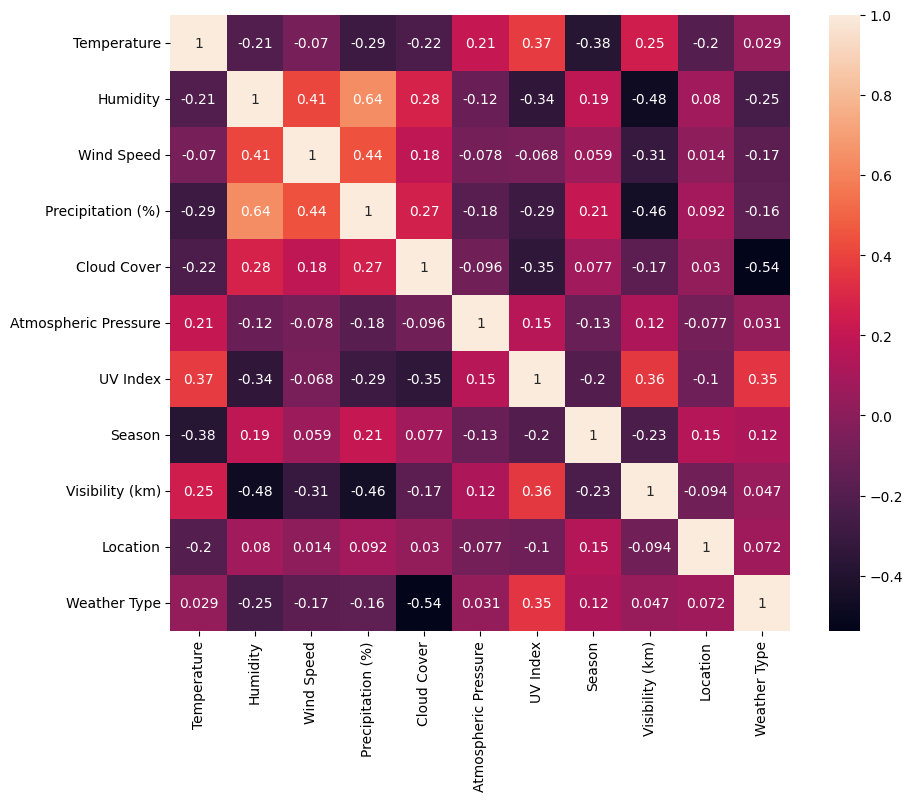

In [11]:
plt.figure(figsize=(10, 8), dpi= 100)
sns.heatmap(df.corr(), annot= True)

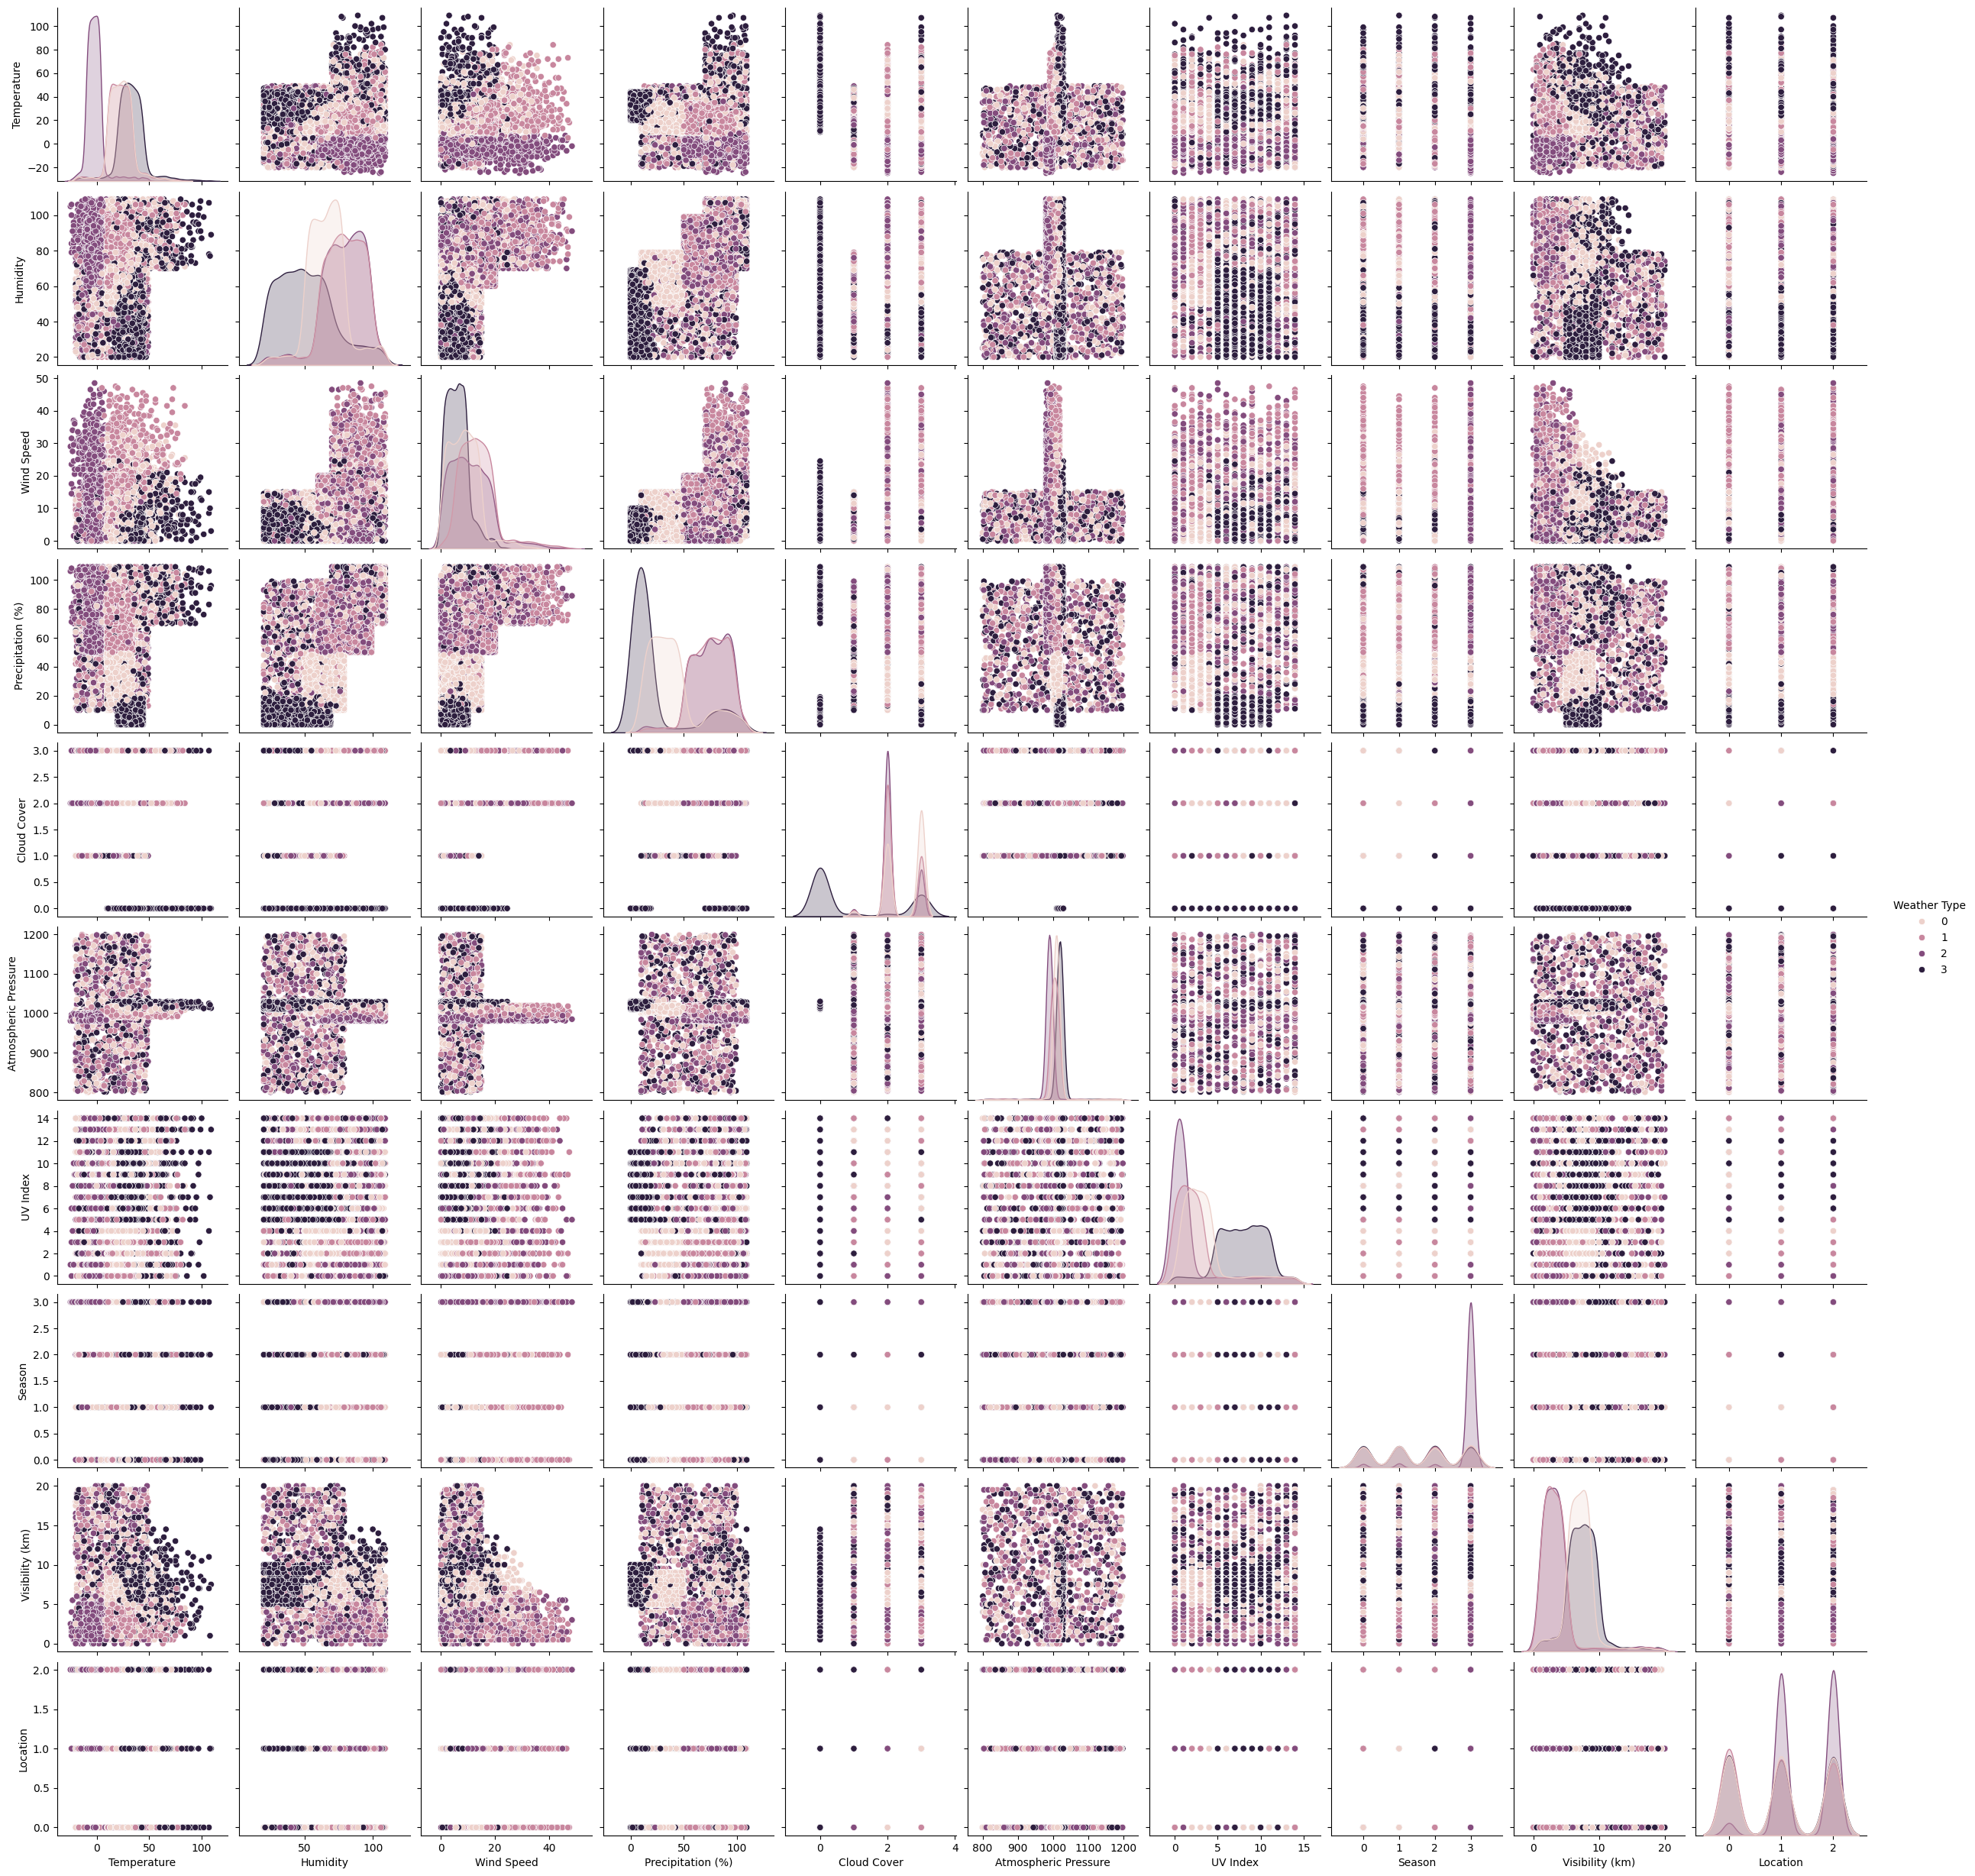

In [12]:
sns.pairplot(data=df, hue= "Weather Type")

##### **X and y**

In [13]:
X = df.drop("Weather Type", axis = 1)
y = df["Weather Type"]

### **train test split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
len(df)

13200

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

### **KNN**

##### **Standar Scaler**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
num_neighbours = [1, 3, 5, 7, 9]

for n in num_neighbours:
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(scaled_X_train, y_train)

    knn_pred = knn.predict(scaled_X_test)
    clr = classification_report(y_test, knn_pred)

    print(clr)
    

Number of Neighbours: 1, Classification Report :               precision    recall  f1-score   support

           0       0.87      0.86      0.86       318
           1       0.89      0.88      0.89       345
           2       0.92      0.94      0.93       323
           3       0.89      0.89      0.89       334

    accuracy                           0.89      1320
   macro avg       0.89      0.89      0.89      1320
weighted avg       0.89      0.89      0.89      1320

Number of Neighbours: 3, Classification Report :               precision    recall  f1-score   support

           0       0.84      0.88      0.86       318
           1       0.88      0.91      0.89       345
           2       0.94      0.93      0.93       323
           3       0.93      0.87      0.90       334

    accuracy                           0.90      1320
   macro avg       0.90      0.90      0.90      1320
weighted avg       0.90      0.90      0.90      1320

Number of Neighbours: 5, Classif

In [21]:
best_knn = KNeighborsClassifier(n_neighbors= 5)
best_knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [22]:
best_knn_pred = best_knn.predict(scaled_X_test)

In [23]:
print(classification_report(y_test, best_knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       318
           1       0.88      0.90      0.89       345
           2       0.91      0.93      0.92       323
           3       0.95      0.87      0.91       334

    accuracy                           0.90      1320
   macro avg       0.90      0.90      0.90      1320
weighted avg       0.90      0.90      0.90      1320



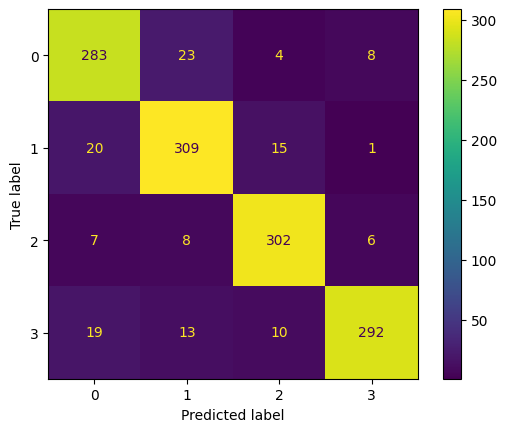

In [24]:
ConfusionMatrixDisplay.from_estimator(best_knn, scaled_X_test, y_test)

### **Random Forest**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
rand_frst = RandomForestClassifier()

In [27]:
params = {
    "n_estimators" : [50, 100, 150, 200],
    "max_features" : [1, 2, 3, 4]
    }

In [28]:
grid_model = GridSearchCV(rand_frst, param_grid= params)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

In [29]:
grid_pred = grid_model.predict(X_test)

In [30]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       318
           1       0.90      0.94      0.92       345
           2       0.92      0.94      0.93       323
           3       0.93      0.89      0.91       334

    accuracy                           0.92      1320
   macro avg       0.92      0.92      0.92      1320
weighted avg       0.92      0.92      0.92      1320



In [31]:
grid_model.best_params_

{'max_features': 2, 'n_estimators': 50}

In [32]:
best_rand_frst = RandomForestClassifier(n_estimators= 50, max_features=2)
best_rand_frst.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=50)

In [33]:
best_rand_pred = best_rand_frst.predict(X_test)

In [34]:
print(classification_report(y_test, best_rand_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       318
           1       0.94      0.94      0.94       345
           2       0.93      0.95      0.94       323
           3       0.94      0.90      0.92       334

    accuracy                           0.93      1320
   macro avg       0.92      0.92      0.92      1320
weighted avg       0.93      0.93      0.93      1320



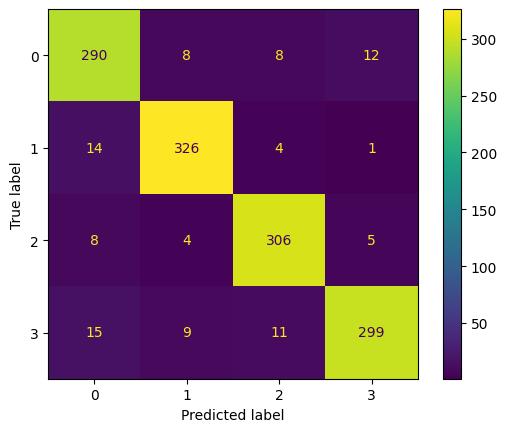

In [35]:
ConfusionMatrixDisplay.from_estimator(best_rand_frst, X_test, y_test)

In [36]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   
3         38.0        83         1.5               82.0            0   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   
3               1026.25         7       1              1.0         0   
4                990.67         1       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1